# Example Notebook

In [1]:
from stream_nwbfile import stream_nwbfile
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

This notebook showcases 4 example sessions from the 001471 dataset containing social behavior and concurrent DeepLabCut pose estimation.

## First Session: Experimental Genotype, 100% Reward Condition

In [2]:
DANDISET_ID = '001471'
file_path = 'sub-XFN1/sub-XFN1_ses-07-20-2023-100_behavior+image.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,float64
Shape,"(35643,)"
Array size,278.46 KiB
Chunk shape,"(35643,)"


Notice the subject and session description

In [3]:
display(nwbfile.subject)
print(nwbfile.session_description)

subject pynwb.file.Subject at 0x6036563792
Fields:
  age: P3M/P5M
  age__reference: birth
  description: Long Evans Rat
  genotype: Fmr1-/y
  sex: M
  species: Rattus norvegicus
  subject_id: XFN1

Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well.


Get Behavior Data

In [4]:
dio_event_names = [
    "matched_poke_A1",
    "matched_poke_B2",
    "matched_poke_C3",
    "reward_well_1",
    "reward_well_2",
    "reward_well_3",
    "reward_well_A",
    "reward_well_B",
    "reward_well_C",
    "rewarded_poke",
]
event_name_to_timestamps = {}
for dio_event_name in dio_event_names:
    timestamps = nwbfile.processing["behavior"].data_interfaces["behavioral_events"].time_series[dio_event_name].timestamps[:]
    event_name_to_timestamps[dio_event_name] = timestamps

Plot Behavior Data

In [5]:
def plot_behavior(axs, matched_poke_A1, matched_poke_B2, matched_poke_C3, 
                  reward_well_1, reward_well_2, reward_well_3,
                  reward_well_A, reward_well_B, reward_well_C, rewarded_poke):
    """
    Plot behavioral events on multiple subplots.
    
    Parameters:
    -----------
    axs : array of matplotlib axes
        Array of 4 subplot axes for plotting different behavioral events
    matched_poke_A1, matched_poke_B2, matched_poke_C3 : array-like
        Timestamps for matched poke events
    reward_well_1, reward_well_2, reward_well_3 : array-like
        Timestamps for reward well events (numbered)
    reward_well_A, reward_well_B, reward_well_C : array-like
        Timestamps for reward well events (lettered)
    rewarded_poke : array-like
        Timestamps for rewarded poke events
    """
    
    # Plot matched pokes
    axs[0].stem(matched_poke_A1, np.ones_like(matched_poke_A1), linefmt='r-', markerfmt='ro', basefmt=' ', label='Matched Poke A1')
    axs[0].stem(matched_poke_B2, np.ones_like(matched_poke_B2)*1.2, linefmt='g-', markerfmt='go', basefmt=' ', label='Matched Poke B2')
    axs[0].stem(matched_poke_C3, np.ones_like(matched_poke_C3)*1.4, linefmt='b-', markerfmt='bo', basefmt=' ', label='Matched Poke C3')
    
    # Plot reward wells 1-3
    axs[1].stem(reward_well_1, np.ones_like(reward_well_1), linefmt='r-', markerfmt='rs', basefmt=' ', label='Reward Well 1')
    axs[1].stem(reward_well_2, np.ones_like(reward_well_2)*1.2, linefmt='g-', markerfmt='gs', basefmt=' ', label='Reward Well 2')
    axs[1].stem(reward_well_3, np.ones_like(reward_well_3)*1.4, linefmt='b-', markerfmt='bs', basefmt=' ', label='Reward Well 3')
    
    # Plot reward wells A-C
    axs[2].stem(reward_well_A, np.ones_like(reward_well_A), linefmt='r-', markerfmt='r^', basefmt=' ', label='Reward Well A')
    axs[2].stem(reward_well_B, np.ones_like(reward_well_B)*1.2, linefmt='g-', markerfmt='g^', basefmt=' ', label='Reward Well B')
    axs[2].stem(reward_well_C, np.ones_like(reward_well_C)*1.4, linefmt='b-', markerfmt='b^', basefmt=' ', label='Reward Well C')
    
    # Plot rewarded pokes
    axs[3].stem(rewarded_poke, np.ones_like(rewarded_poke), linefmt='k-', markerfmt='ko', basefmt=' ', label='Rewarded Poke')
    
    for i, ax in enumerate(axs):
        ax.set_ylim([0, 2])
        ax.set_yticks([])
        ax.legend(loc='upper right', fontsize='small')
    
    axs[-1].set_xlabel('Time (s)')
    axs[0].set_ylabel('Matched Pokes')
    axs[1].set_ylabel('Reward Wells 1-3')
    axs[2].set_ylabel('Reward Wells A-C')
    axs[3].set_ylabel('Rewarded Pokes')

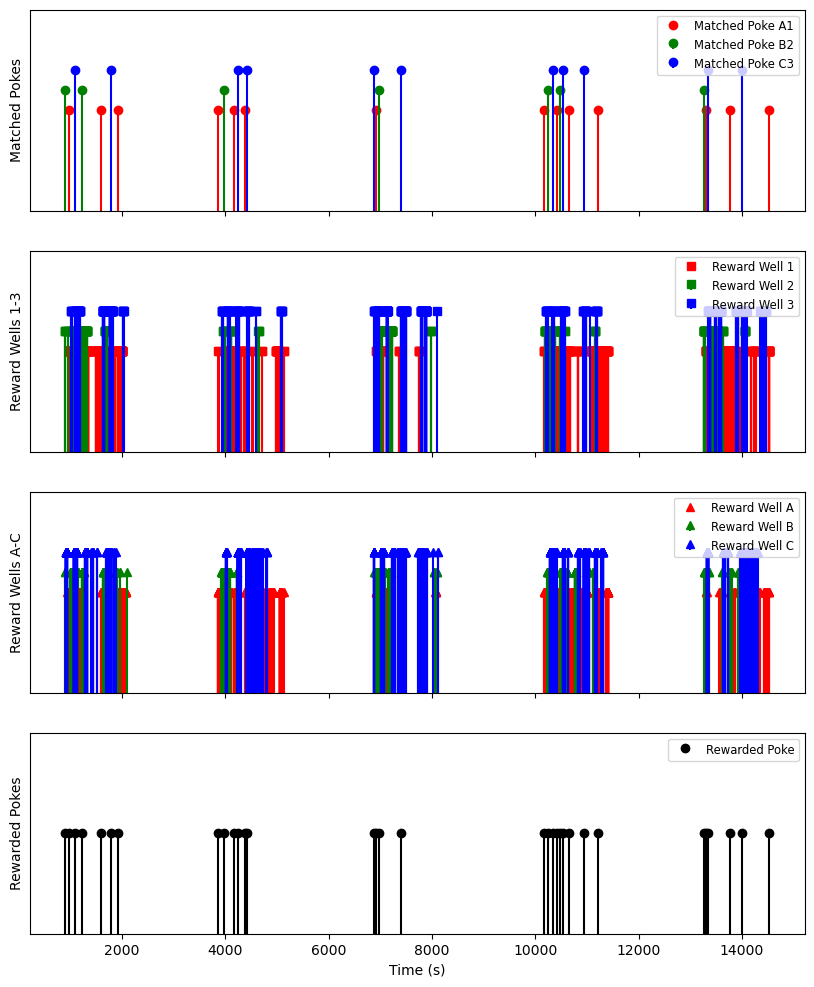

In [6]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
plot_behavior(axs, **event_name_to_timestamps)

Get DLC data for the first epoch

In [7]:
pose_estimation = nwbfile.processing["behavior"].data_interfaces["PoseEstimation_1-XFN1-1"]
        
nodes = pose_estimation.skeleton.nodes[:]
edges = pose_estimation.skeleton.edges[:]
pes = pose_estimation.pose_estimation_series
name_to_data = {name: series.data[:] for name, series in pes.items()}
pes_timestamps = pes["PoseEstimationSeriesBody center"].timestamps[:]
node_to_name = {node: f"PoseEstimationSeries{node.capitalize()}" for node in nodes}

Plot DLC data

In [8]:
def plot_pose_estimation(nodes, edges, name_to_data, node_to_name, timestamps):
    """
    Plot pose estimation data with trajectory and skeleton structure.
    
    Parameters:
    -----------
    nodes : array-like
        Node names for the pose estimation skeleton
    edges : array-like
        Edge connections between nodes
    name_to_data : dict
        Dictionary mapping node names to position data
    node_to_name : dict
        Dictionary mapping node indices to series names
    timestamps : array-like
        Timestamps for the pose estimation data
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Average position scatter plot with trajectory
    all_x = np.array([name_to_data[node_to_name[node]][:, 0] for node in nodes])
    all_y = np.array([name_to_data[node_to_name[node]][:, 1] for node in nodes])

    x = np.nanmean(all_x, axis=0)
    y = np.nanmean(all_y, axis=0)

    sc = ax1.scatter(x, y, c=timestamps, cmap='viridis', s=1)
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_title('Average Position Trajectory')
    plt.colorbar(sc, ax=ax1, label='Time (s)')
    
    # Right plot: Network graph using networkx
    
    # Create a graph
    G = nx.Graph()
    
    # Add nodes
    for i, node in enumerate(nodes):
        G.add_node(i, label=node)
    
    # Add edges
    for edge in edges:
        G.add_edge(edge[0], edge[1])
    
    # Create layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the network
    nx.draw(G, pos, ax=ax2, with_labels=True, 
            labels={i: nodes[i] for i in range(len(nodes))},
            node_color='lightblue', node_size=1000, 
            font_size=10, font_weight='bold',
            edge_color='gray', width=2)
    
    ax2.set_title('Pose Estimation Skeleton Structure')
    ax2.axis('off')
    
    plt.tight_layout()

    return fig, (ax1, ax2)

/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:24: RuntimeWarning: Mean of empty slice
  x = np.nanmean(all_x, axis=0)
/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:25: RuntimeWarning: Mean of empty slice
  y = np.nanmean(all_y, axis=0)


(<Figure size 2000x800 with 3 Axes>,
 (<Axes: title={'center': 'Average Position Trajectory'}, xlabel='X Position', ylabel='Y Position'>,
  <Axes: title={'center': 'Pose Estimation Skeleton Structure'}>))

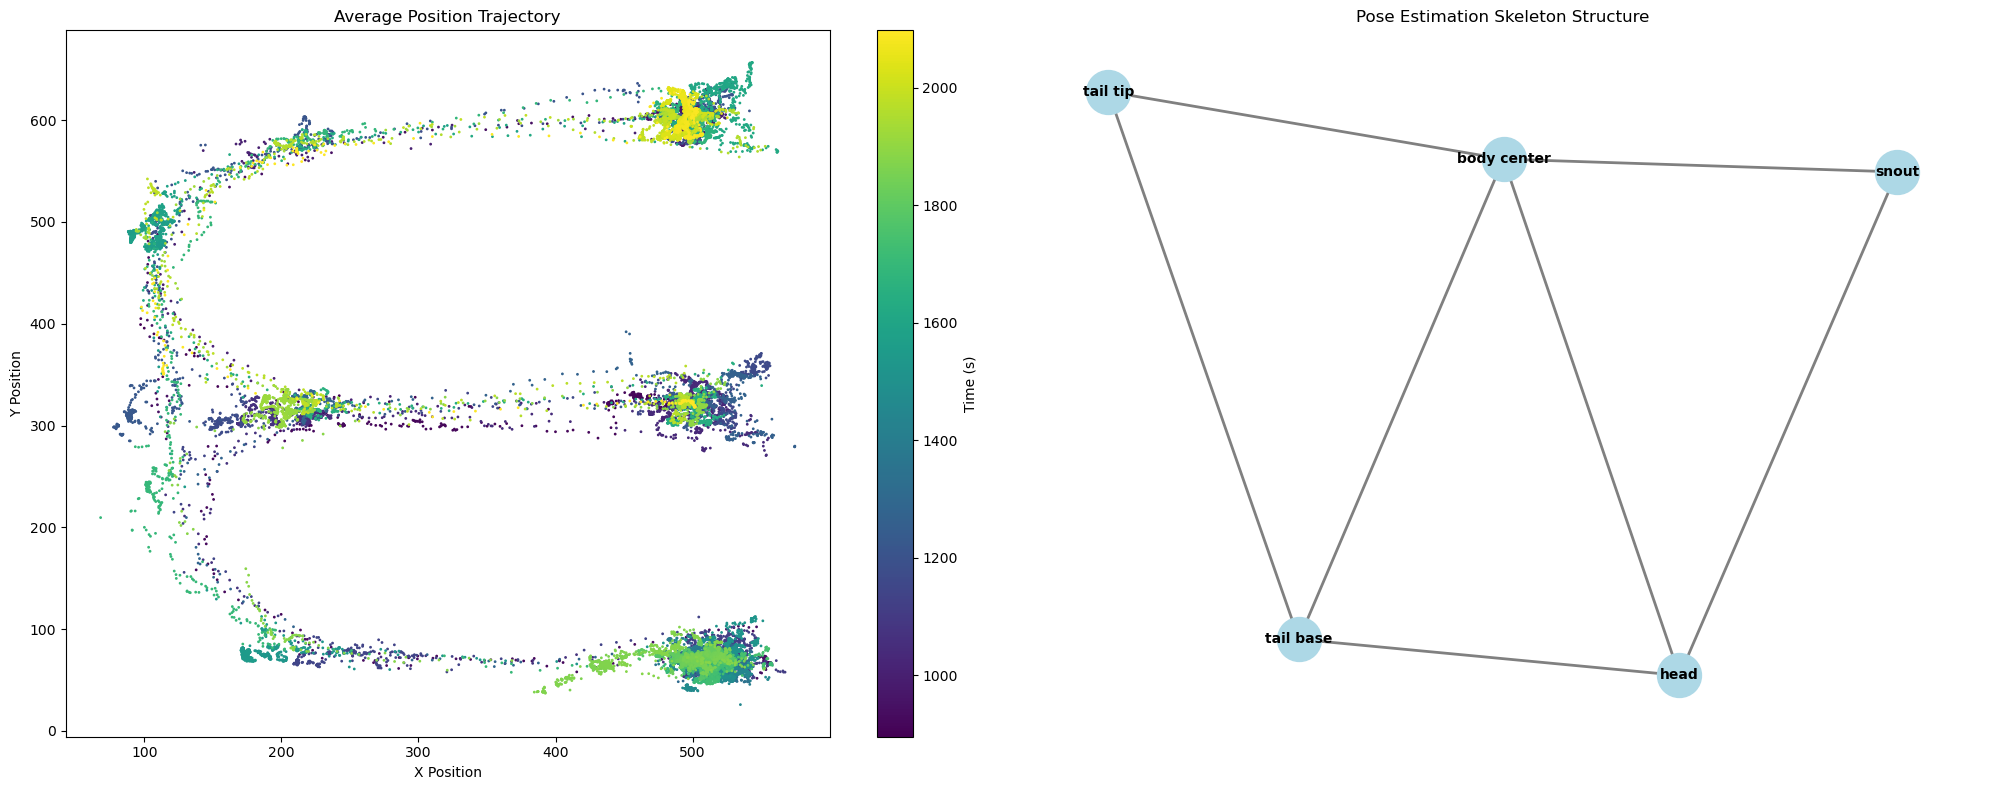

In [9]:
plot_pose_estimation(nodes, edges, name_to_data, node_to_name, pes_timestamps)

## Second Session: Experimental Genotype, 50% Reward Condition

In [10]:
file_path = 'sub-XFN1/sub-XFN1_ses-08-08-2023-50_behavior+image.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,float64
Shape,"(37418,)"
Array size,292.33 KiB
Chunk shape,"(37418,)"


Notice the subject and session description

In [11]:
display(nwbfile.subject)
print(nwbfile.session_description)

subject pynwb.file.Subject at 0x6042883504
Fields:
  age: P3M/P5M
  age__reference: birth
  description: Long Evans Rat
  genotype: Fmr1-/y
  sex: M
  species: Rattus norvegicus
  subject_id: XFN1

Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 50% of the time when both rats poked the same well.


Get Behavior Data

In [12]:
dio_event_names = [
    "matched_poke_A1",
    "matched_poke_B2",
    "matched_poke_C3",
    "reward_well_1",
    "reward_well_2",
    "reward_well_3",
    "reward_well_A",
    "reward_well_B",
    "reward_well_C",
    "rewarded_poke",
]
event_name_to_timestamps = {}
for dio_event_name in dio_event_names:
    timestamps = nwbfile.processing["behavior"].data_interfaces["behavioral_events"].time_series[dio_event_name].timestamps[:]
    event_name_to_timestamps[dio_event_name] = timestamps

Plot Behavior Data

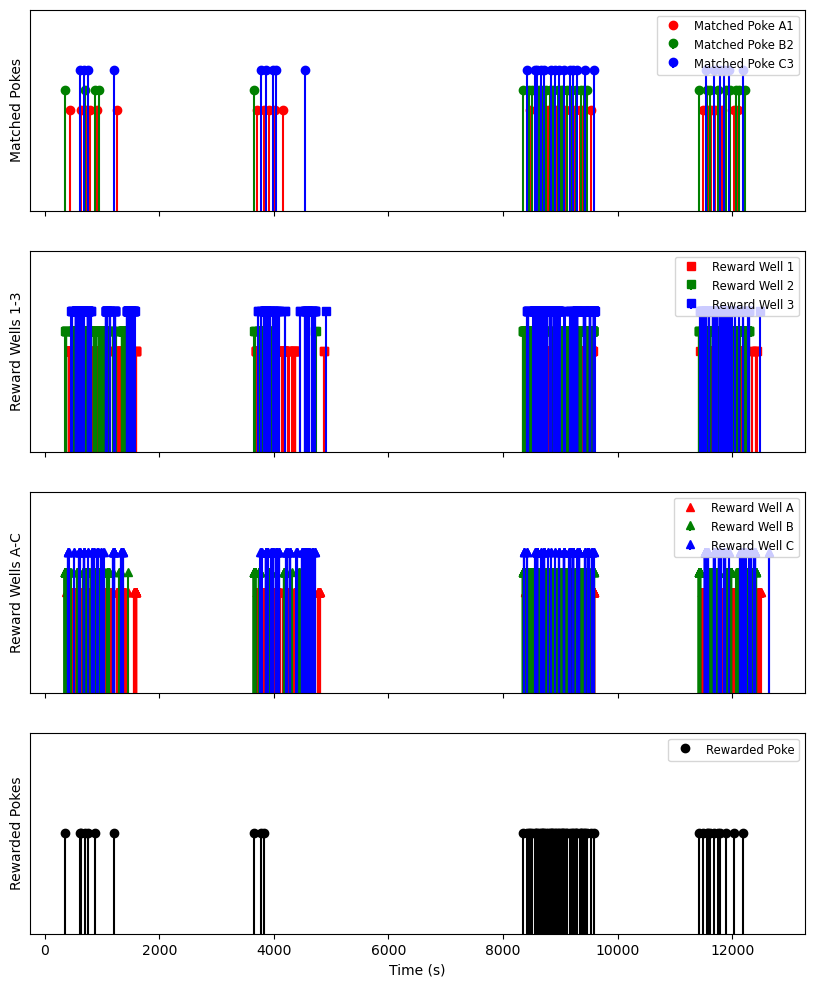

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
plot_behavior(axs, **event_name_to_timestamps)

Get DLC data for the first epoch

In [14]:
pose_estimation = nwbfile.processing["behavior"].data_interfaces["PoseEstimation_1-XFN1-1"]
        
nodes = pose_estimation.skeleton.nodes[:]
edges = pose_estimation.skeleton.edges[:]
pes = pose_estimation.pose_estimation_series
name_to_data = {name: series.data[:] for name, series in pes.items()}
pes_timestamps = pes["PoseEstimationSeriesBody center"].timestamps[:]
node_to_name = {node: f"PoseEstimationSeries{node.capitalize()}" for node in nodes}

Plot DLC data

/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:24: RuntimeWarning: Mean of empty slice
  x = np.nanmean(all_x, axis=0)
/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:25: RuntimeWarning: Mean of empty slice
  y = np.nanmean(all_y, axis=0)


(<Figure size 2000x800 with 3 Axes>,
 (<Axes: title={'center': 'Average Position Trajectory'}, xlabel='X Position', ylabel='Y Position'>,
  <Axes: title={'center': 'Pose Estimation Skeleton Structure'}>))

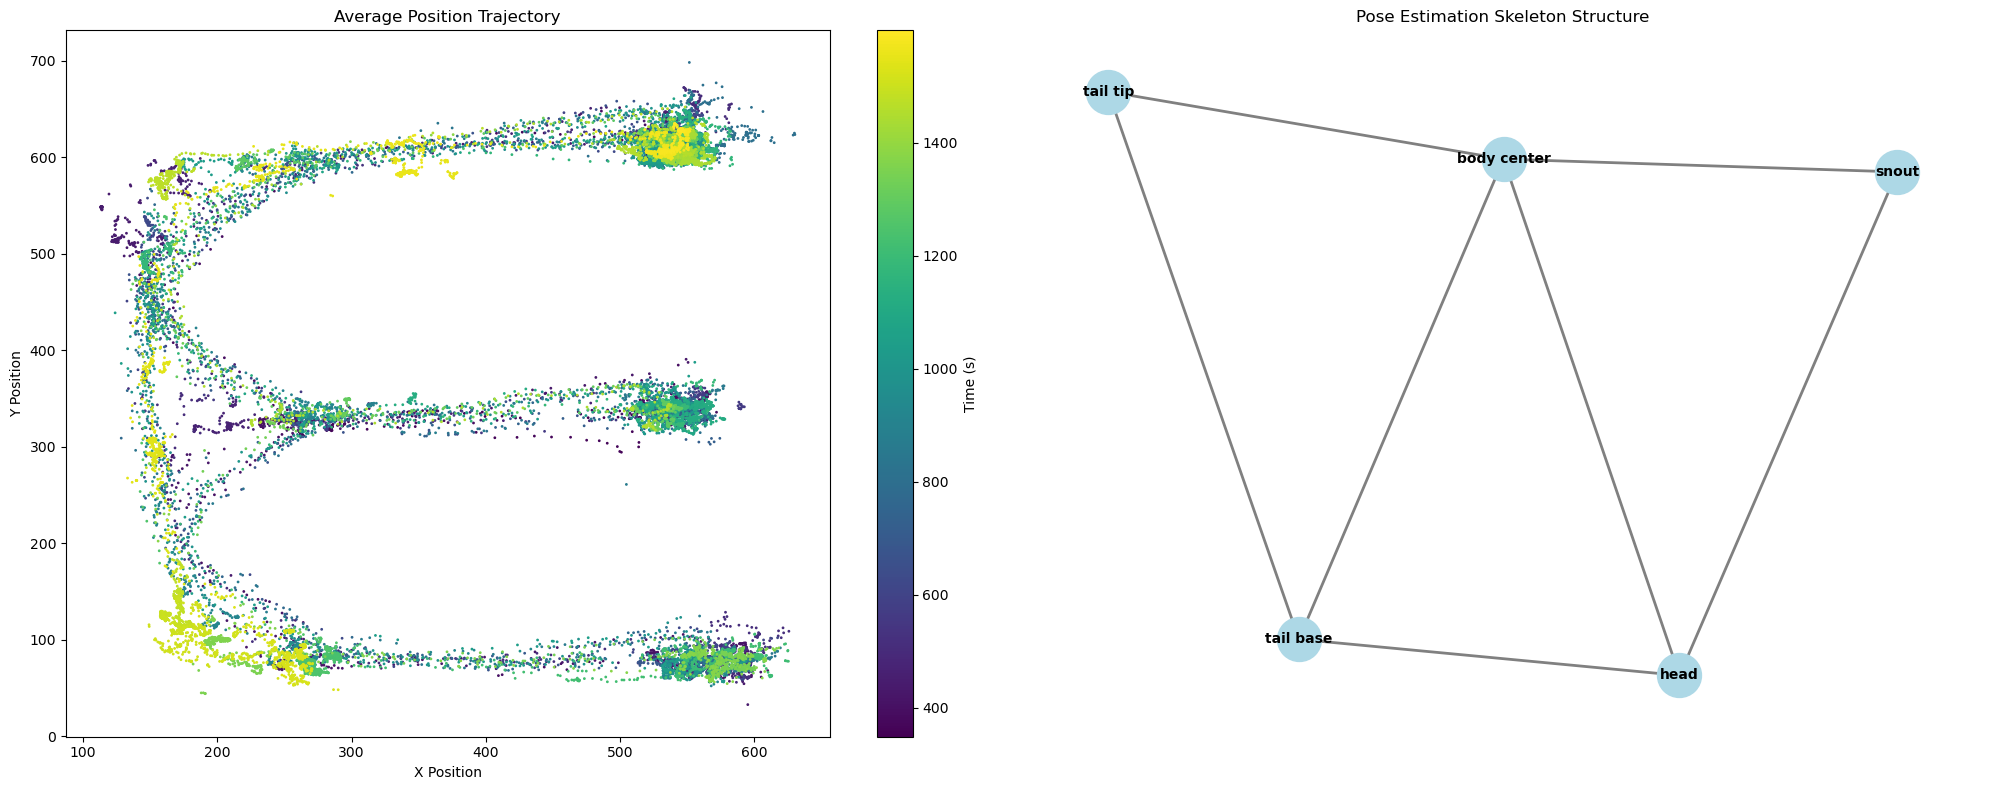

In [15]:
plot_pose_estimation(nodes, edges, name_to_data, node_to_name, pes_timestamps)

## Third Session: Experimental Genotype, Opaque Reward Condition

In [16]:
file_path = 'sub-XFN1/sub-XFN1_ses-08-16-2023-Opaque_behavior+image.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,float64
Shape,"(37345,)"
Array size,291.76 KiB
Chunk shape,"(37345,)"


Notice the subject and session description

In [17]:
display(nwbfile.subject)
print(nwbfile.session_description)

subject pynwb.file.Subject at 0x6057260384
Fields:
  age: P3M/P5M
  age__reference: birth
  description: Long Evans Rat
  genotype: Fmr1-/y
  sex: M
  species: Rattus norvegicus
  subject_id: XFN1

Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well, but an opaque barrier was placed between the two mazes so the rats could not see each other.


Get Behavior Data

In [18]:
dio_event_names = [
    "matched_poke_A1",
    "matched_poke_B2",
    "matched_poke_C3",
    "reward_well_1",
    "reward_well_2",
    "reward_well_3",
    "reward_well_A",
    "reward_well_B",
    "reward_well_C",
    "rewarded_poke",
]
event_name_to_timestamps = {}
for dio_event_name in dio_event_names:
    timestamps = nwbfile.processing["behavior"].data_interfaces["behavioral_events"].time_series[dio_event_name].timestamps[:]
    event_name_to_timestamps[dio_event_name] = timestamps

Plot Behavior Data

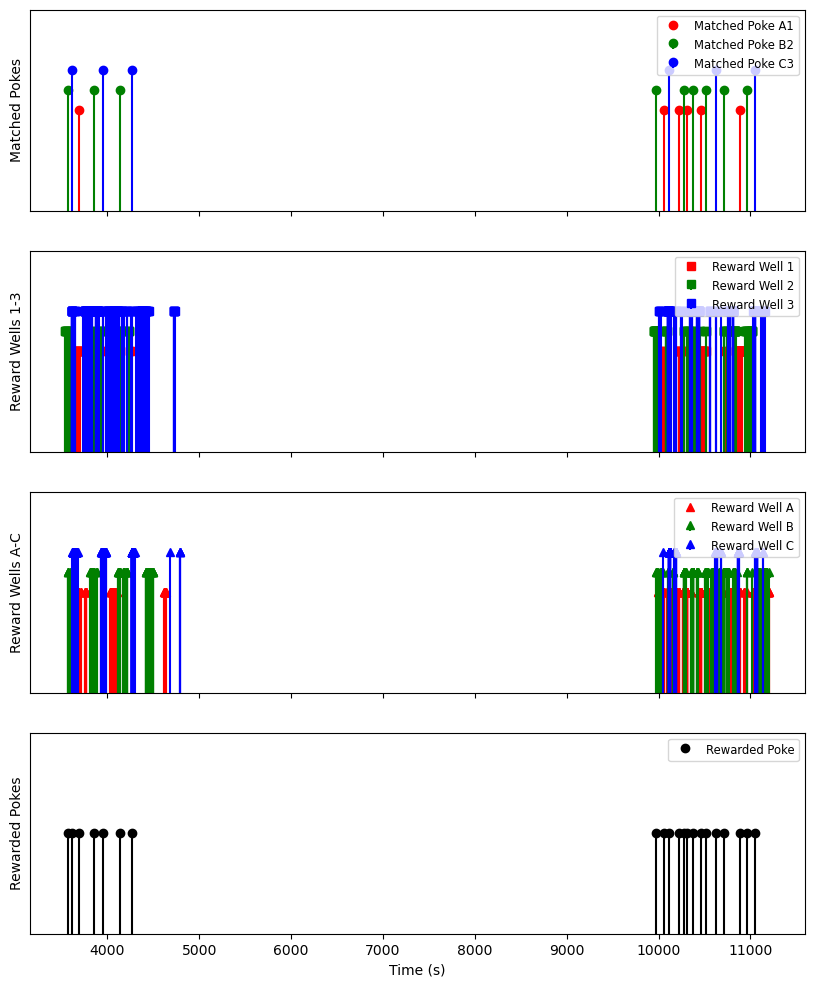

In [19]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
plot_behavior(axs, **event_name_to_timestamps)

Get DLC data for the first epoch

In [20]:
pose_estimation = nwbfile.processing["behavior"].data_interfaces["PoseEstimation_3-XFN1-1"]
        
nodes = pose_estimation.skeleton.nodes[:]
edges = pose_estimation.skeleton.edges[:]
pes = pose_estimation.pose_estimation_series
name_to_data = {name: series.data[:] for name, series in pes.items()}
pes_timestamps = pes["PoseEstimationSeriesBody center"].timestamps[:]
node_to_name = {node: f"PoseEstimationSeries{node.capitalize()}" for node in nodes}

Plot DLC data

/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:24: RuntimeWarning: Mean of empty slice
  x = np.nanmean(all_x, axis=0)
/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:25: RuntimeWarning: Mean of empty slice
  y = np.nanmean(all_y, axis=0)


(<Figure size 2000x800 with 3 Axes>,
 (<Axes: title={'center': 'Average Position Trajectory'}, xlabel='X Position', ylabel='Y Position'>,
  <Axes: title={'center': 'Pose Estimation Skeleton Structure'}>))

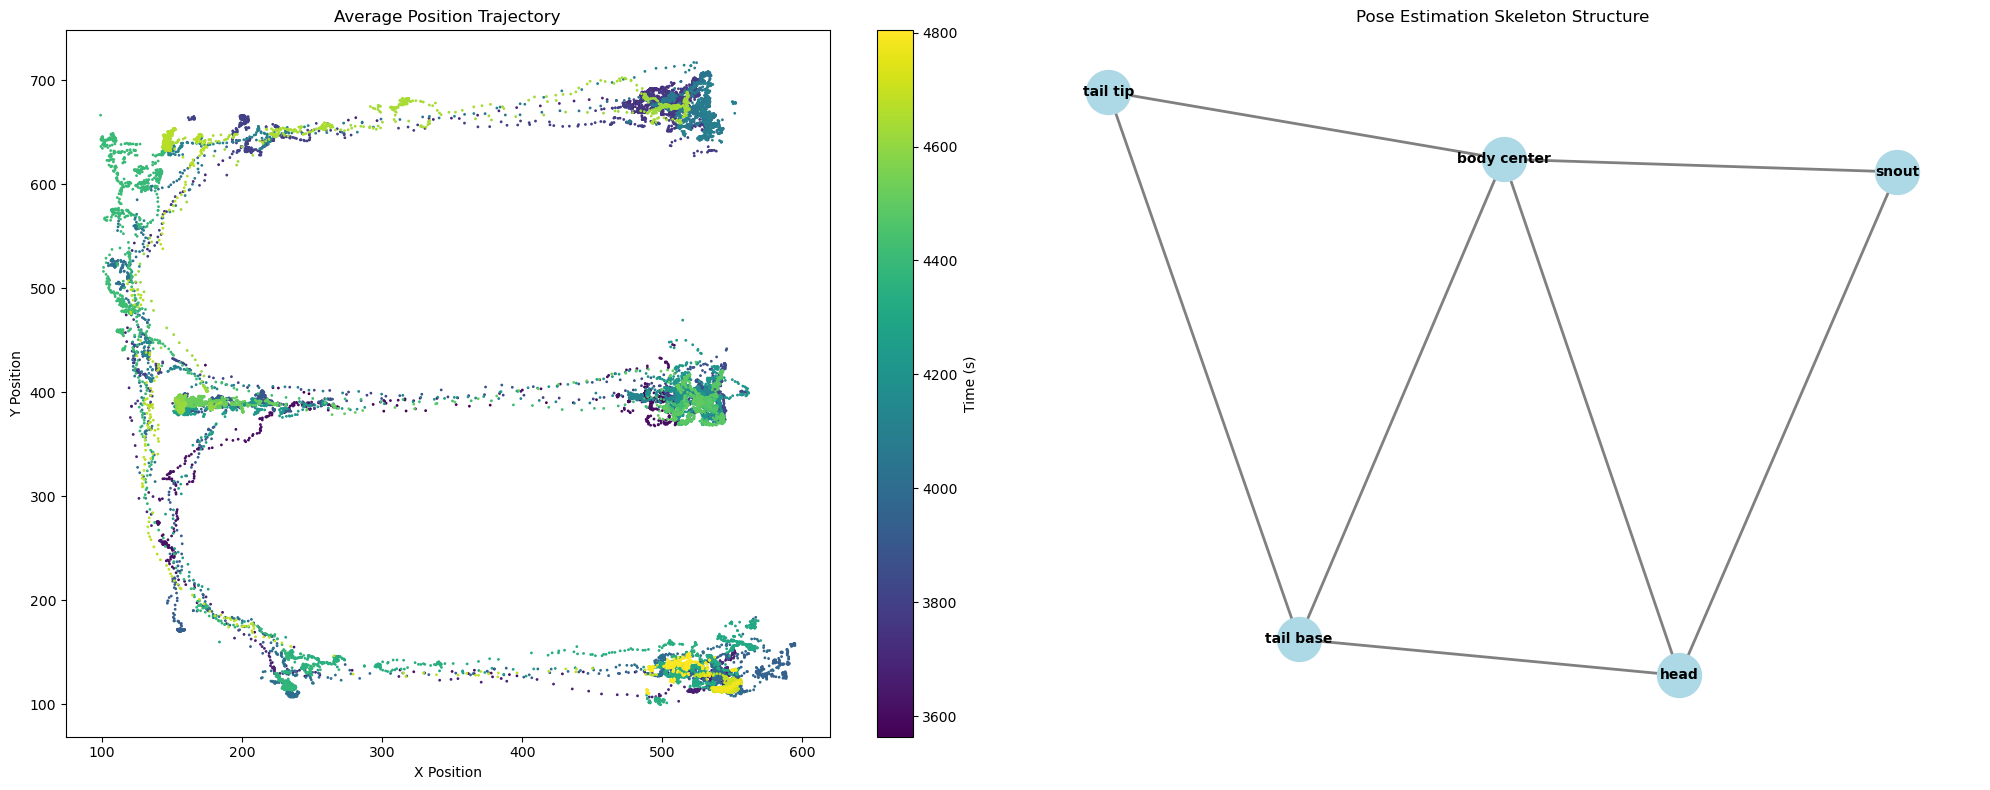

In [21]:
plot_pose_estimation(nodes, edges, name_to_data, node_to_name, pes_timestamps)

## Fourth Session: Control Genotype, 100% Reward Condition

In [22]:
file_path = 'sub-XFN2/sub-XFN2_ses-07-19-2023-100_behavior+image.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,float64
Shape,"(32784,)"
Array size,256.12 KiB
Chunk shape,"(32784,)"


Notice the subject and session description

In [23]:
display(nwbfile.subject)
print(nwbfile.session_description)

subject pynwb.file.Subject at 0x6058991856
Fields:
  age: P3M/P5M
  age__reference: birth
  description: Long Evans Rat
  genotype: WT
  sex: M
  species: Rattus norvegicus
  subject_id: XFN2

Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well.


Get Behavior Data

In [24]:
dio_event_names = [
    "matched_poke_A1",
    "matched_poke_B2",
    "matched_poke_C3",
    "reward_well_1",
    "reward_well_2",
    "reward_well_3",
    "reward_well_A",
    "reward_well_B",
    "reward_well_C",
    "rewarded_poke",
]
event_name_to_timestamps = {}
for dio_event_name in dio_event_names:
    timestamps = nwbfile.processing["behavior"].data_interfaces["behavioral_events"].time_series[dio_event_name].timestamps[:]
    event_name_to_timestamps[dio_event_name] = timestamps

Plot Behavior Data

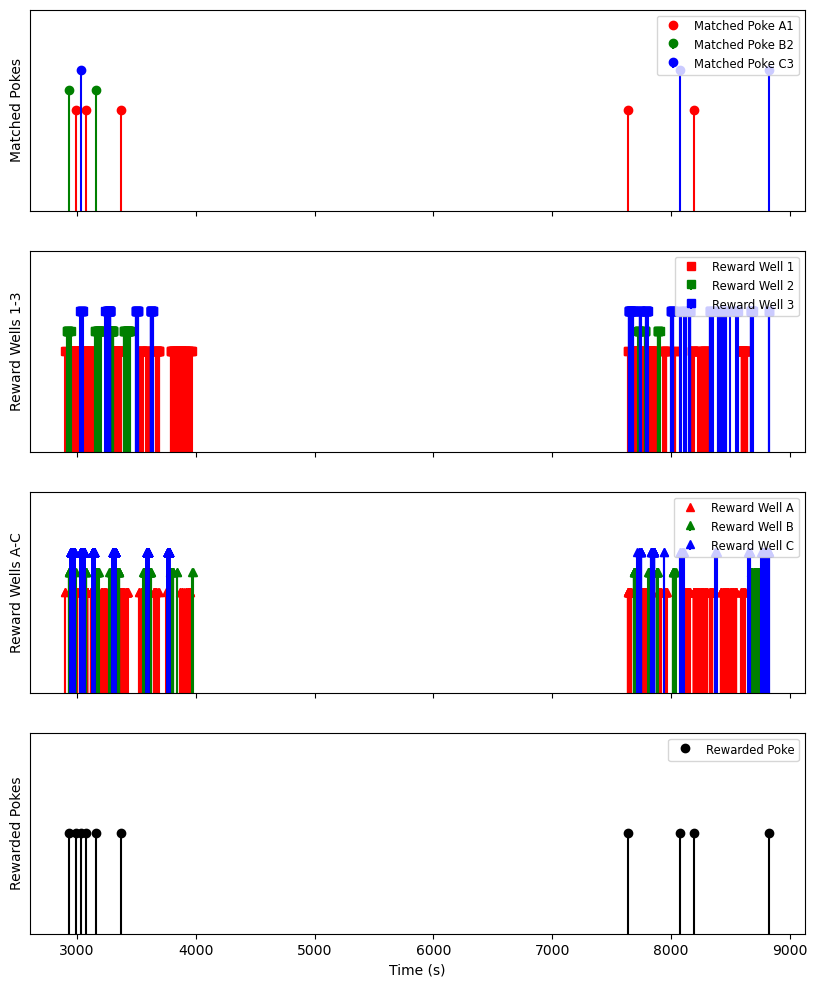

In [25]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
plot_behavior(axs, **event_name_to_timestamps)

Get DLC data for the first epoch

In [26]:
pose_estimation = nwbfile.processing["behavior"].data_interfaces["PoseEstimation_2-XFN2-1"]
        
nodes = pose_estimation.skeleton.nodes[:]
edges = pose_estimation.skeleton.edges[:]
pes = pose_estimation.pose_estimation_series
name_to_data = {name: series.data[:] for name, series in pes.items()}
pes_timestamps = pes["PoseEstimationSeriesBody center"].timestamps[:]
node_to_name = {node: f"PoseEstimationSeries{node.capitalize()}" for node in nodes}

Plot DLC data

/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:24: RuntimeWarning: Mean of empty slice
  x = np.nanmean(all_x, axis=0)
/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_64435/468386134.py:25: RuntimeWarning: Mean of empty slice
  y = np.nanmean(all_y, axis=0)


(<Figure size 2000x800 with 3 Axes>,
 (<Axes: title={'center': 'Average Position Trajectory'}, xlabel='X Position', ylabel='Y Position'>,
  <Axes: title={'center': 'Pose Estimation Skeleton Structure'}>))

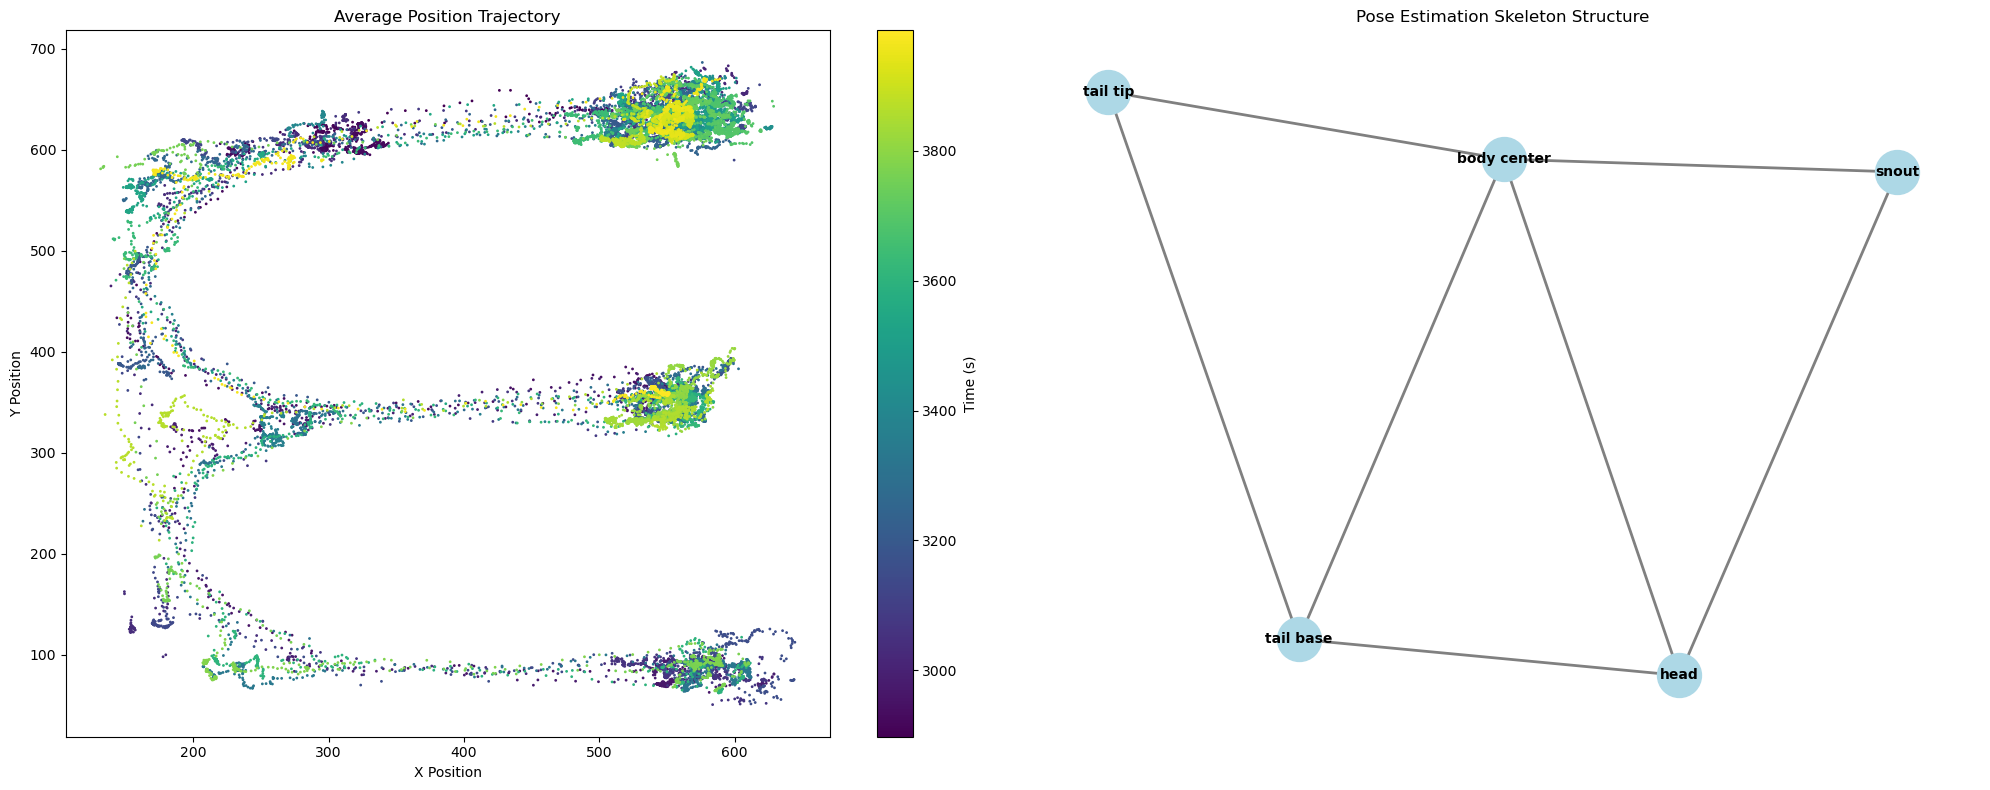

In [27]:
plot_pose_estimation(nodes, edges, name_to_data, node_to_name, pes_timestamps)